
# Clustering Project

## This algorithm is aimed to use K-means in order to divide students in a dormitory base on their similarities in cultures, personalities, and habits.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
sample = pd.read_csv("file:///C:/Users/Ali%20Fard/Desktop/clustering%20project/Clustering-Project_BNUT/sample2.csv")
# take a look at the dataset
sample.head()

,student code,city,personality,day/ night person,smoke
0,1,2,2,1,2
1,2,3,11,2,1
2,3,2,14,1,1
3,4,5,3,2,2
4,5,1,12,2,1


In [3]:
sample1=sample.drop(['day/ night person','student code','smoke'],axis=1)

sample1.head()

,city,personality
0,2,2
1,3,11
2,2,14
3,5,3
4,1,12


In [4]:
from sklearn.preprocessing import StandardScaler
X=sample1
X = sample1.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.00503782, -1.36596373],
       [-0.30151134,  0.63699556],
       [-1.00503782,  1.30464865],
       [ 1.1055416 , -1.1434127 ],
       [-1.70856429,  0.85954659],
       [-0.30151134,  1.52719968],
       [ 0.40201513,  0.85954659],
       [ 0.40201513,  1.30464865],
       [ 1.80906807,  0.41444452],
       [-1.70856429, -0.03065754],
       [ 1.80906807,  0.63699556],
       [ 0.40201513,  1.08209762],
       [-1.00503782, -0.03065754],
       [ 1.1055416 ,  0.63699556],
       [ 0.40201513, -0.69831064],
       [-1.00503782,  0.63699556],
       [ 1.1055416 ,  0.85954659],
       [-0.30151134,  0.19189349],
       [ 1.80906807, -0.92086167],
       [ 0.40201513,  0.19189349],
       [-1.70856429, -1.36596373],
       [ 0.40201513,  1.08209762],
       [ 0.40201513, -0.69831064],
       [ 1.80906807, -0.03065754],
       [-1.00503782,  1.74975071],
       [ 1.1055416 ,  0.85954659],
       [-1.00503782, -0.25320857],
       [-1.70856429, -0.25320857],
       [-0.30151134,

In [5]:
clusterNum = 7
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[2 4 5 6 5 0 0 0 3 2 3 0 2 3 1 5 3 4 6 4 2 0 1 6 5 3 2 2 1 1 4 4 2 2 1 4 2
 2 0 0 3 4 2 4 0 3 1 2 0 4 2 0 1 4 3 6 3 0 1 1 1 6 4 1 2 0 1 2 6 1 6 2 6 2
 6 5 6 0 2 6 4 4 6 2 5 1 6 5 4 5 4 3 0 1 6 1 4 1 2 1 0 1 0 4 6 5 5 0 2 2 6
 4 3 5 4 5 3 0 4 1 3 3 4 5 6 6 1 2 0 6 6 2 6 4 2 2 3 6 4 6 6 4 6 4 2 3 4 4
 2 6 6 5 4 3 1 5 2 1 2 1 2 4 4 0 5 1 3 0 3 0 5 2 0 2 1 5 2 2 1 2 5 1 0 3 0
 5 2 6 6 6 0 1 2 3 6 0]


In [6]:
sample1["Clus_km"] = labels
sample1.head(10)

,city,personality,Clus_km
0,2,2,2
1,3,11,4
2,2,14,5
3,5,3,6
4,1,12,5
5,3,15,0
6,4,12,0
7,4,14,0
8,6,10,3
9,1,8,2


In [7]:
sample1.groupby('Clus_km').mean()

,city,personality
Clus_km,,
0,3.444444,13.962963
1,3.586207,3.620690
2,1.710526,4.394737
3,5.333333,13.095238
4,3.433333,9.233333
5,1.650000,12.300000
6,5.225806,4.774194


In [8]:
#sample_list=sample1.values.tolist()


In [9]:
#c0=[]
#for i in range (195):
#    if sample_list[i][2]==0:
#         c0.append(sample_list[i])

# df = pd.DataFrame(c0)
# writer = pd.ExcelWriter('test0.xlsx', engine='xlsxwriter')
# df.to_excel(writer, sheet_name='c0', index=False)
# writer.save()
# writer.close()

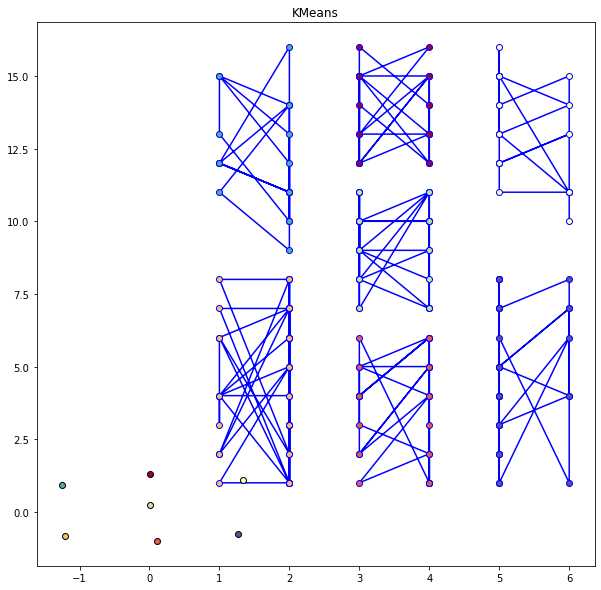

In [10]:
k_means_labels=labels
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 10))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    #print(my_members)
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'b', markerfacecolor=col, marker='o')
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
#ax.set_xticks(())

# Remove y-axis ticks
#ax.set_yticks(())

# Show the plot
plt.show()


In [12]:
for k in range(len(k_means_cluster_centers)):
    my_members = (k_means_labels == k)

    a=X[my_members]
    print (len(a))

print (a)

27
29
38
21
30
20
31
[[5 3]
 [6 4]
 [6 8]
 [5 7]
 [5 7]
 [5 2]
 [5 4]
 [5 3]
 [6 6]
 [5 1]
 [5 6]
 [6 1]
 [6 7]
 [5 5]
 [5 5]
 [5 3]
 [5 8]
 [5 2]
 [5 1]
 [5 8]
 [5 2]
 [5 4]
 [5 4]
 [5 7]
 [5 8]
 [5 5]
 [6 4]
 [6 7]
 [5 5]
 [5 4]
 [5 7]]
